In [ ]:
import pandas as pd
import numpy as np
from skimage.io import imread, imsave
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
# loading dataset
data = pd.read_csv('/gdrive/MyDrive/emergency_vs_non-emergency_dataset/emergency_vs_non-emergency_dataset/emergency_train.csv')
data.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [ ]:
# loading images
train_img = []
for img_name in tqdm(data['image_names']):
    image_path = '/gdrive/MyDrive/emergency_vs_non-emergency_dataset/emergency_vs_non-emergency_dataset/images/' + img_name
    img = imread(image_path)
    img = img/255
    img = cv2.resize(img,(128,128))
    train_img.append(img)

train_x = np.array(train_img)
train_y = data['emergency_or_not'].values
train_x.shape, train_y.shape

100%|██████████| 1646/1646 [19:19<00:00,  1.42it/s]


((1646, 128, 128, 3), (1646,))

In [ ]:
print(train_y)

[1 1 0 ... 1 0 0]


In [ ]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1, random_state = 13, stratify=train_y)
(train_x.shape, train_y.shape), (val_x.shape, val_y.shape)

(((1481, 128, 128, 3), (1481,)), ((165, 128, 128, 3), (165,)))

In [ ]:
print(train_y)
print(val_y)

[1 1 0 ... 1 0 0]
[0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1
 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0]


In [ ]:
import keras
import tensorflow as tf
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(128,128,3)),
            keras.layers.Dense(256,activation =tf.nn.tanh),
            keras.layers.Dense(2,activation = tf.nn.softmax)
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 256)               12583168  
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 12,583,682
Trainable params: 12,583,682
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss ='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_x,train_y,epochs=5)

Epoch 1/5
47/47 [==============================] - 6s 104ms/step - loss: 8.3500 - accuracy: 0.4139
Epoch 2/5
47/47 [==============================] - 6s 122ms/step - loss: 0.8037 - accuracy: 0.5368
Epoch 3/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6807 - accuracy: 0.5861
Epoch 4/5
47/47 [==============================] - 5s 109ms/step - loss: 0.6835 - accuracy: 0.5861
Epoch 5/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6831 - accuracy: 0.5861


In [ ]:
model.fit(train_x,train_y,epochs=20)

Epoch 1/20
47/47 [==============================] - 4s 78ms/step - loss: 0.6898 - accuracy: 0.5544
Epoch 2/20
47/47 [==============================] - 4s 77ms/step - loss: 0.6983 - accuracy: 0.5571
Epoch 3/20
47/47 [==============================] - 4s 77ms/step - loss: 0.6882 - accuracy: 0.5665
Epoch 4/20
47/47 [==============================] - 4s 78ms/step - loss: 0.6866 - accuracy: 0.5672
Epoch 5/20
47/47 [==============================] - 4s 77ms/step - loss: 0.6865 - accuracy: 0.5618
Epoch 6/20
47/47 [==============================] - 4s 77ms/step - loss: 0.6839 - accuracy: 0.5699
Epoch 7/20
47/47 [==============================] - 4s 77ms/step - loss: 0.6898 - accuracy: 0.5591
Epoch 8/20
47/47 [==============================] - 4s 77ms/step - loss: 0.6824 - accuracy: 0.5726
Epoch 9/20
47/47 [==============================] - 4s 87ms/step - loss: 0.6829 - accuracy: 0.5861
Epoch 10/20
47/47 [==============================] - 4s 78ms/step - loss: 0.6886 - accuracy: 0.5625
Epoch 11/

In [ ]:
# evaluate the model
scores = model.evaluate(val_x, val_y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 41.21%


In [ ]:

# predict probabilities for test set
yhat_probs = model.predict(val_x, verbose=0)
# predict crisp classes for test set
yhat_classes = np.argmax(model.predict(val_x), axis=-1)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
class newmodel(model):
    def __init__(self, model):
        self.model = model
    def predict(self, val_x):
        val_y = self.model.predict(val_x)
        return np.argmax(val_x,axis=1)

model1 = newmodel(model)
plot_confusion_matrix(model1,val_x, val_y , normalize='true', xticks_rotation = 'vertical', display_labels = list(train_generator.class_indices.keys()))

In [ ]:
# predict probabilities for test set
yhat_probs = model.predict(val_x,batch_size=10,verbose=0)

In [ ]:
# predict crisp classes for test set
yhat_classes = np.argmax(model.predict(val_x), axis=-1)

In [ ]:
for i in yhat_classes:
  print(i)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [ ]:

import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
cm= confusion_matrix(val_y,yhat_classes)


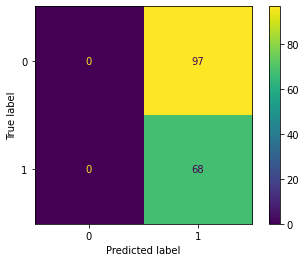

In [ ]:
disp =ConfusionMatrixDisplay(cm)
disp.plot()

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator


from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

In [ ]:
modelcnn = Sequential()
modelcnn.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(128,128,3)))
modelcnn.add(MaxPool2D())

modelcnn.add(Conv2D(32, 3, padding="same", activation="relu"))
modelcnn.add(MaxPool2D())

modelcnn.add(Conv2D(64, 3, padding="same", activation="relu"))
modelcnn.add(MaxPool2D())
modelcnn.add(Dropout(0.4))

modelcnn.add(Flatten())
modelcnn.add(Dense(128,activation="relu"))
modelcnn.add(Dense(2, activation="softmax"))

modelcnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 64)      

In [ ]:
modelcnn.compile(optimizer=tf.keras.optimizers.Adam(),
              loss ='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = modelcnn.fit(train_x,train_y,epochs = 20 , validation_data = (val_x,val_y))

Epoch 1/20
47/47 [==============================] - 33s 683ms/step - loss: 0.7012 - accuracy: 0.6307 - val_loss: 0.6091 - val_accuracy: 0.6485
Epoch 2/20
47/47 [==============================] - 32s 678ms/step - loss: 0.5574 - accuracy: 0.7171 - val_loss: 0.4760 - val_accuracy: 0.7758
Epoch 3/20
47/47 [==============================] - 34s 731ms/step - loss: 0.4689 - accuracy: 0.7900 - val_loss: 0.4523 - val_accuracy: 0.7818
Epoch 4/20
47/47 [==============================] - 32s 682ms/step - loss: 0.4130 - accuracy: 0.8130 - val_loss: 0.4401 - val_accuracy: 0.8061
Epoch 5/20
47/47 [==============================] - 48s 1s/step - loss: 0.3483 - accuracy: 0.8427 - val_loss: 0.4122 - val_accuracy: 0.8424
Epoch 6/20
47/47 [==============================] - 42s 891ms/step - loss: 0.3131 - accuracy: 0.8629 - val_loss: 0.3999 - val_accuracy: 0.8364
Epoch 7/20
47/47 [==============================] - 32s 682ms/step - loss: 0.2648 - accuracy: 0.8926 - val_loss: 0.4726 - val_accuracy: 0.8000
Ep

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
predictions = np.argmax(modelcnn.predict(val_x), axis=-1)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(val_y, predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        97
           1       0.78      0.75      0.77        68

    accuracy                           0.81       165
   macro avg       0.81      0.80      0.80       165
weighted avg       0.81      0.81      0.81       165



In [ ]:
print(classification_report(val_y, yhat_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.41      1.00      0.58        68

    accuracy                           0.41       165
   macro avg       0.21      0.50      0.29       165
weighted avg       0.17      0.41      0.24       165



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
